In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
# loading the dataset
data=pd.read_csv("matches.csv")
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [53]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [55]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [56]:
print(len(data.axes[0]))

756


In [57]:
print(len(data.axes[1]))

18


In [58]:
data.isnull().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [59]:
# dropping unwanted columns
df=data.drop(['id','date','dl_applied','umpire1','umpire2','umpire3'],axis=1)
df.columns

Index(['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match',
       'venue'],
      dtype='object')

In [60]:
# checking for ,issing values, venues w.r.t city
print(df[df.city.isnull()][['city','venue']])

    city                                venue
461  NaN  Dubai International Cricket Stadium
462  NaN  Dubai International Cricket Stadium
466  NaN  Dubai International Cricket Stadium
468  NaN  Dubai International Cricket Stadium
469  NaN  Dubai International Cricket Stadium
474  NaN  Dubai International Cricket Stadium
476  NaN  Dubai International Cricket Stadium


In [61]:
df.city = df.city.fillna('Dubai')
print(df)

     season           city                        team1  \
0      2017      Hyderabad          Sunrisers Hyderabad   
1      2017           Pune               Mumbai Indians   
2      2017         Rajkot                Gujarat Lions   
3      2017         Indore       Rising Pune Supergiant   
4      2017      Bangalore  Royal Challengers Bangalore   
..      ...            ...                          ...   
751    2019         Mumbai        Kolkata Knight Riders   
752    2019        Chennai          Chennai Super Kings   
753    2019  Visakhapatnam          Sunrisers Hyderabad   
754    2019  Visakhapatnam               Delhi Capitals   
755    2019      Hyderabad               Mumbai Indians   

                           team2                  toss_winner toss_decision  \
0    Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1         Rising Pune Supergiant       Rising Pune Supergiant         field   
2          Kolkata Knight Riders        Kolkata Knight

In [62]:
city_venue = df.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
print(city_venue_df)

                                                                   season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium,

In [63]:
# replacing duplicate entries
df=df.replace("Bangalore","Bengaluru")
df=df.replace("M Chinnaswamy Stadium","M. Chinnaswamy Stadium")
df=df.replace("Punjab Cricket Association Stadium, Mohali","Punjab Cricket Association")
df=df.replace("M. A. Chidambaram Stadium","MA Chidambaram Stadium, Chepauk")
df=df.replace("Feroz Shah Kotla","Feroz Shah Kotla Ground")
df=df.replace("Rajiv Gandhi Intl. Cricket Stadium","Rajiv Gandhi International Stadium")
df=df.replace("IS Bindra Stadium","Punjab Cricket Association IS Bindra Stadium, Mohali")
df=df.replace("ACA-VDCA Stadium","Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium")
df=df.replace("Mohali","Chandigarh")
df

,season,city,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Bengaluru,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M. Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav,"MA Chidambaram Stadium, Chepauk"
753,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
754,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...


In [64]:
# Dataset grouped by city and venue
city_venue1 = df.groupby(['city','venue']).count()['season']
city_venue_df_1 = pd.DataFrame(city_venue1)
city_venue_df_1

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bengaluru      M. Chinnaswamy Stadium                                  80
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association                              35
               Punjab Cricket Association IS Bindra Stadium, M...      21
Chennai        MA Chidambaram Stadium, Chepauk                         57
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla Ground                                 74
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium                       8
               Rajiv Gandhi International Stadium, Uppal               56
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      13

In [65]:
# Number of wins for each team
number_of_wins_for_each_team=df['winner'].value_counts()
number_of_wins_for_each_team

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<AxesSubplot:>

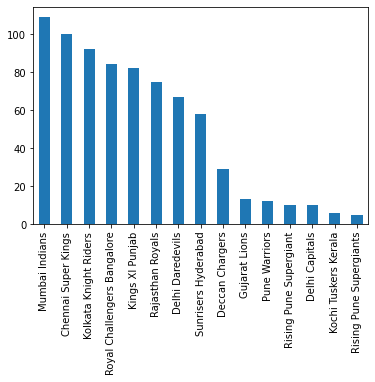

In [66]:
number_of_wins_for_each_team.plot(kind='bar')

In [67]:
# city has hosted maximum number ipl matches
max_matches_in_cities=df['city'].value_counts()
max_matches_in_cities

Mumbai            101
Bengaluru          80
Kolkata            77
Delhi              74
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Durban             15
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Ranchi              7
Dubai               7
Cuttack             7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

<AxesSubplot:>

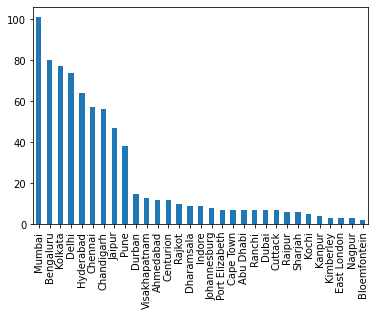

In [68]:
max_matches_in_cities.plot(kind='bar')

In [69]:
# number of matches played in each year
matches_in_each_year=data['season'].value_counts()
matches_in_each_year

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

<AxesSubplot:>

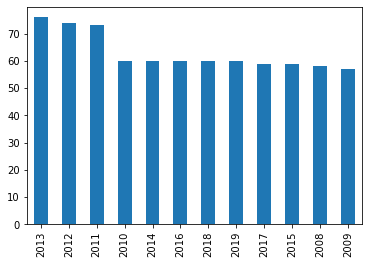

In [70]:
matches_in_each_year.plot(kind='bar')

In [71]:
# Number of 'man of the match award' getting each players
man_of_the_match=df['player_of_match'].value_counts().head(10)
man_of_the_match

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

<AxesSubplot:>

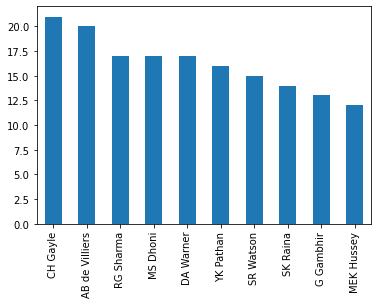

In [72]:
man_of_the_match.plot(kind='bar')

In [73]:
# Most toss winning team
df['toss_winner'].max()

'Sunrisers Hyderabad'

In [74]:
# Least toss winnig team
df['toss_winner'].min()

'Chennai Super Kings'

In [75]:
# seasons
df['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [76]:
# Team won by most run
df.iloc[df['win_by_runs'].idxmax()]['winner']
counts=df.groupby(['winner','win_by_runs']).size().reset_index(name='counts')
counts_sort=counts.sort_values('win_by_runs',ascending=False)
first_5_win_by_runs=counts_sort.head(5)
first_5_win_by_runs

,winner,win_by_runs,counts
184,Mumbai Indians,146,1
252,Royal Challengers Bangalore,144,1
146,Kolkata Knight Riders,140,1
251,Royal Challengers Bangalore,138,1
250,Royal Challengers Bangalore,130,1


<AxesSubplot:title={'center':'Winners by runs'}, xlabel='winner'>

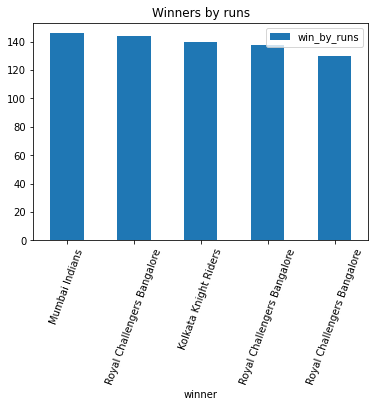

In [77]:
first_5_win_by_runs.plot.bar(x="winner", y="win_by_runs", rot=70, title="Winners by runs")

In [78]:
wkts=df.groupby(['winner','win_by_wickets']).size().reset_index(name='counts')
wkts_sort=wkts.sort_values('win_by_wickets',ascending=False)
first_5_win_by_wkts=wkts_sort.head(5)
first_5_win_by_wkts

,winner,win_by_wickets,counts
115,Sunrisers Hyderabad,10,1
47,Kings XI Punjab,10,1
32,Delhi Daredevils,10,1
105,Royal Challengers Bangalore,10,3
61,Kolkata Knight Riders,10,1


<AxesSubplot:title={'center':'Winners by wickets'}, xlabel='winner'>

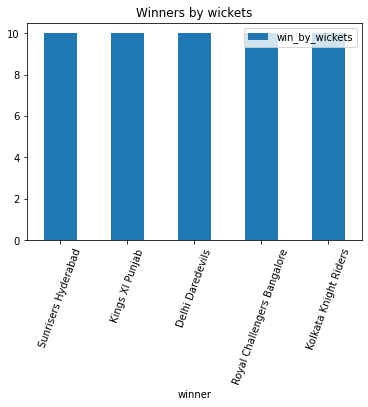

In [79]:
first_5_win_by_wkts.plot.bar(x="winner", y="win_by_wickets", rot=70, title="Winners by wickets")

In [80]:
#Which Team had won by maximum wicket?
df.iloc[df['win_by_wickets'].idxmax()]
count_sorted=first_5_win_by_wkts.sort_values('counts',ascending=False)
count_sorted.head(1)                                             

,winner,win_by_wickets,counts
105,Royal Challengers Bangalore,10,3


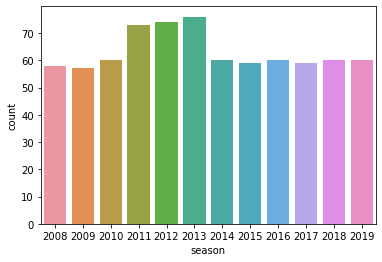

In [81]:
#Which Season had most number of matches?
sns.countplot(x = 'season',data=df)
plt.show()

In [82]:
# Has Toss-winning helped in winning matches?
t = df['toss_winner'] == df['winner']
t.groupby(t).size()

False    363
True     393
dtype: int64